In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import tree

In [2]:
def get_rules(df, tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != sklearn.tree._tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != sklearn.tree._tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)
    
    features_list = []
    cond_list = []
    values_list = []
    means_list = []
    sample_list = []
    for path in paths:
        features = []
        cond = []
        values = []
        for i in range(len(path)-1):
            pathn = path[i][1:-1]
            pathn1 = pathn.split(' ')[0]
            cond1 = pathn.split(' ')[1]
            values1 = float(pathn.split(' ')[2])
            
            features.append(pathn1)
            cond.append(cond1)
            values.append(values1)
               
        features_list.append(features)
        cond_list.append(cond)
        values_list.append(values)
        means = float(path[-1][0][0][0])
        sample = int(path[-1][1])
        means_list.append(means)
        sample_list.append(sample)
        
    child_list = np.arange(1, len(features_list)+1)
    df['ChildNo'] = -1
    df['NoOfSamples'] = -1
    df['Means'] = -1
    for i,j, k, m, n, o in zip(features_list, cond_list, values_list, child_list, means_list, sample_list):
        print(i,j, k, m, n, o)
        for l in range(len(j)):
            if j[l]=='>':
                cond1 = (df[i[l]] > k[l])
            else:
                cond1 = (df[i[l]] <= k[l])
            if l == 0:
                cond2 = cond1.copy()
                #print('cond1 : \n', cond2)
            else:
                cond2 = (cond1 & cond2)
                #print('cond2 : \n', cond3)
        df['ChildNo'] = np.where(cond2, m, df['ChildNo'])
        df['NoOfSamples'] = np.where(cond2, o, df['NoOfSamples'])
        df['Means'] = np.where(cond2, n, df['Means'])
    a=df['ChildNo'].copy()
    b=df['NoOfSamples'].copy()
    c=df['Means'].copy()
    df.drop(columns=['ChildNo', 'NoOfSamples', 'Means'], inplace=True)
    return a,b,c

In [3]:
def finaldf(df, feature_names, class_name, numberOfTrees):
    for i in range(numberOfTrees):
        f = df[class_name].mean()
        if i>0:
            df['f'+str(i)] = df['f'+str(i-1)] + 0.1*df['h'+str(i)]
        else:
            df['f'+str(i)] = f
        df['y-f'+str(i)] = df[class_name] - df['f'+str(i)]
        dtr = DecisionTreeRegressor(max_depth=2)
        dtr.fit(X_train, df['y-f'+str(i)])

        plt.figure(figsize=(12,6))  # set plot size (denoted in inches)
        tree.plot_tree(dtr, fontsize=10)
        plt.show()

        a, b, c = get_rules(df, dtr, feature_names, 'y-f'+str(i))
        df['c'+str(i+1)] = a
        df['n'+str(i+1)] = b
        df['h'+str(i+1)] = c
    return df

## GB with 3 predictor variables

In [4]:
cols = ['Height','FavoriteColor','Gender','Weight']
data = [[1.6,'Blue','Male',88],
[1.6,'Green','Female',76],
[1.5,'Blue','Female',56],
[1.8,'Red','Male',73],
[1.5,'Green','Male',77],
[1.4,'Blue','Female',57]]
df = pd.DataFrame(data = data, columns=cols)
df

,Height,FavoriteColor,Gender,Weight
0,1.6,Blue,Male,88
1,1.6,Green,Female,76
2,1.5,Blue,Female,56
3,1.8,Red,Male,73
4,1.5,Green,Male,77
5,1.4,Blue,Female,57


In [5]:
df.replace({'Red': 1, 'Green': 2, 'Blue': 3, 'Female': 0, 'Male': 1}, inplace=True)
df

,Height,FavoriteColor,Gender,Weight
0,1.6,3,1,88
1,1.6,2,0,76
2,1.5,3,0,56
3,1.8,1,1,73
4,1.5,2,1,77
5,1.4,3,0,57


In [6]:
X_train = df.iloc[:, :-1]
feature_names = list(X_train.columns)
Y_train = df.iloc[:, -1]
target_name = Y_train.name

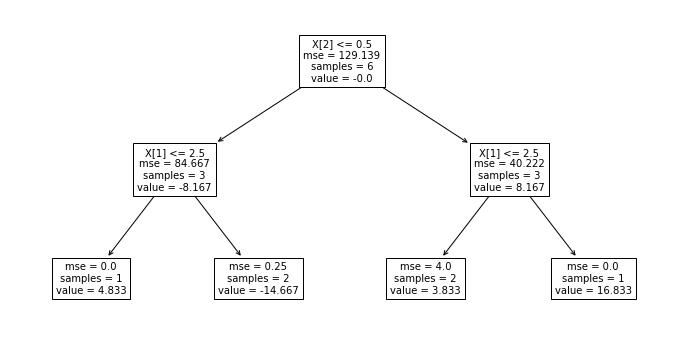

['Gender', 'FavoriteColor'] ['<=', '<='] [0.5, 2.5] 1 4.833333333333329 1
['Gender', 'FavoriteColor'] ['<=', '>'] [0.5, 2.5] 2 -14.666666666666671 2
['Gender', 'FavoriteColor'] ['>', '<='] [0.5, 2.5] 3 3.8333333333333286 2
['Gender', 'FavoriteColor'] ['>', '>'] [0.5, 2.5] 4 16.83333333333333 1


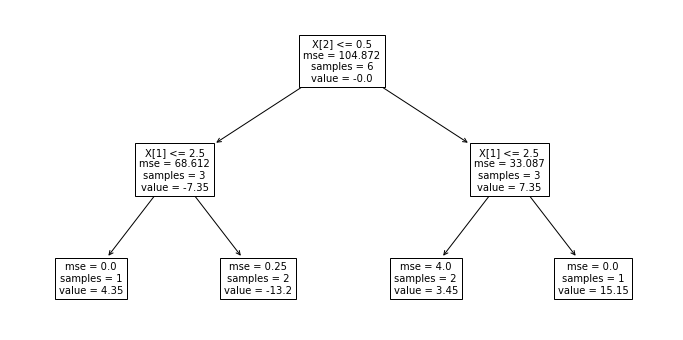

['Gender', 'FavoriteColor'] ['<=', '<='] [0.5, 2.5] 1 4.349999999999994 1
['Gender', 'FavoriteColor'] ['<=', '>'] [0.5, 2.5] 2 -13.200000000000003 2
['Gender', 'FavoriteColor'] ['>', '<='] [0.5, 2.5] 3 3.4499999999999886 2
['Gender', 'FavoriteColor'] ['>', '>'] [0.5, 2.5] 4 15.149999999999991 1


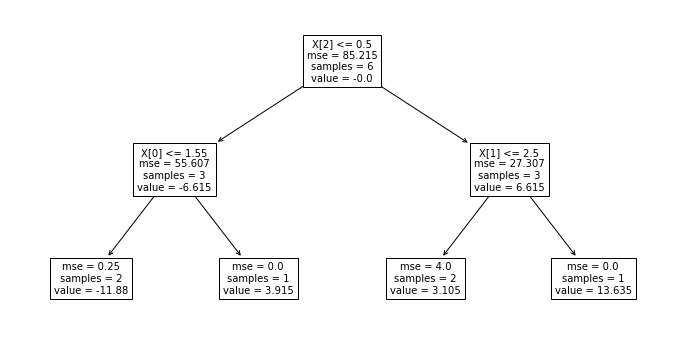

['Gender', 'Height'] ['<=', '<='] [0.5, 1.55] 1 -11.879999999999995 2
['Gender', 'Height'] ['<=', '>'] [0.5, 1.55] 2 3.914999999999992 1
['Gender', 'FavoriteColor'] ['>', '<='] [0.5, 2.5] 3 3.1049999999999898 2
['Gender', 'FavoriteColor'] ['>', '>'] [0.5, 2.5] 4 13.634999999999991 1


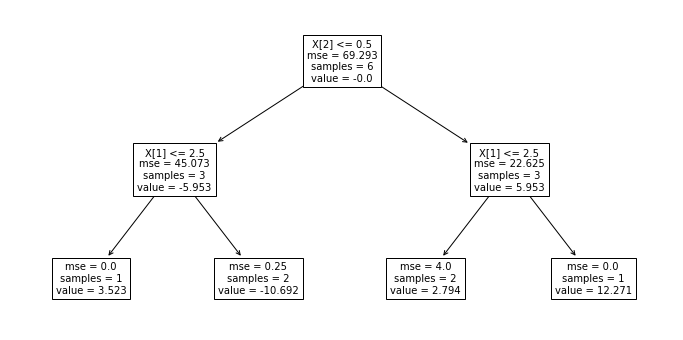

['Gender', 'FavoriteColor'] ['<=', '<='] [0.5, 2.5] 1 3.5234999999999985 1
['Gender', 'FavoriteColor'] ['<=', '>'] [0.5, 2.5] 2 -10.691999999999993 2
['Gender', 'FavoriteColor'] ['>', '<='] [0.5, 2.5] 3 2.794499999999985 2
['Gender', 'FavoriteColor'] ['>', '>'] [0.5, 2.5] 4 12.271499999999989 1


,Height,FavoriteColor,Gender,Weight,f0,y-f0,c1,n1,h1,f1,y-f1,c2,n2,h2,f2,y-f2,c3,n3,h3,f3,y-f3,c4,n4,h4
0,1.6,3,1,88,71.166667,16.833333,4,1,16.833333,72.85,15.15,4,1,15.15,74.365,13.635,4,1,13.635,75.7285,12.2715,4,1,12.2715
1,1.6,2,0,76,71.166667,4.833333,1,1,4.833333,71.65,4.35,1,1,4.35,72.085,3.915,2,1,3.915,72.4765,3.5235,1,1,3.5235
2,1.5,3,0,56,71.166667,-15.166667,2,2,-14.666667,69.70,-13.70,2,2,-13.20,68.380,-12.380,1,2,-11.880,67.1920,-11.1920,2,2,-10.6920
3,1.8,1,1,73,71.166667,1.833333,3,2,3.833333,71.55,1.45,3,2,3.45,71.895,1.105,3,2,3.105,72.2055,0.7945,3,2,2.7945
4,1.5,2,1,77,71.166667,5.833333,3,2,3.833333,71.55,5.45,3,2,3.45,71.895,5.105,3,2,3.105,72.2055,4.7945,3,2,2.7945
5,1.4,3,0,57,71.166667,-14.166667,2,2,-14.666667,69.70,-12.70,2,2,-13.20,68.380,-11.380,1,2,-11.880,67.1920,-10.1920,2,2,-10.6920


In [7]:
finaldf(df, feature_names, 'Weight', 4)

## GB with 1 predictor variables

In [8]:
year = [5,7,12,23,25,28,29,34,35,40]
salary = [82,80,103,118,172,127,204,189,99,166]
df = pd.DataFrame(columns=['Years','Salary'])
df.Years = year
df.Salary = salary
df

,Years,Salary
0,5,82
1,7,80
2,12,103
3,23,118
4,25,172
5,28,127
6,29,204
7,34,189
8,35,99
9,40,166


In [9]:
X_train = df.iloc[:, :-1]
feature_names = list(X_train.columns)
Y_train = df.iloc[:, -1]
target_name = Y_train.name

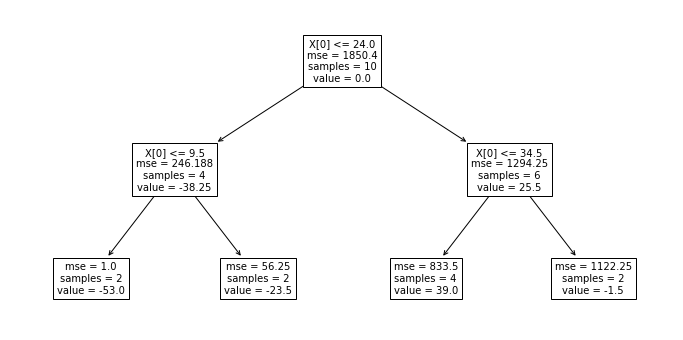

['Years', 'Years'] ['<=', '<='] [24.0, 9.5] 1 -53.0 2
['Years', 'Years'] ['<=', '>'] [24.0, 9.5] 2 -23.5 2
['Years', 'Years'] ['>', '<='] [24.0, 34.5] 3 39.0 4
['Years', 'Years'] ['>', '>'] [24.0, 34.5] 4 -1.5 2


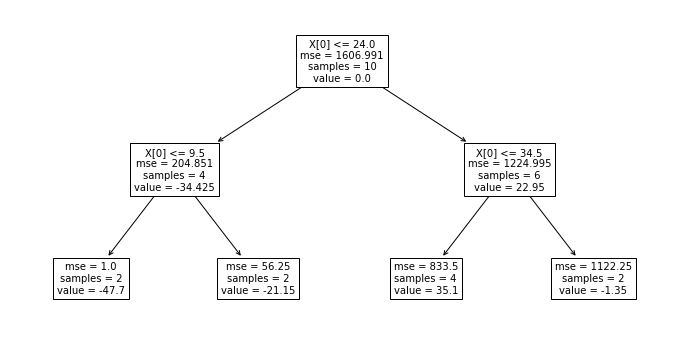

['Years', 'Years'] ['<=', '<='] [24.0, 9.5] 1 -47.69999999999999 2
['Years', 'Years'] ['<=', '>'] [24.0, 9.5] 2 -21.150000000000006 2
['Years', 'Years'] ['>', '<='] [24.0, 34.5] 3 35.099999999999994 4
['Years', 'Years'] ['>', '>'] [24.0, 34.5] 4 -1.3499999999999943 2


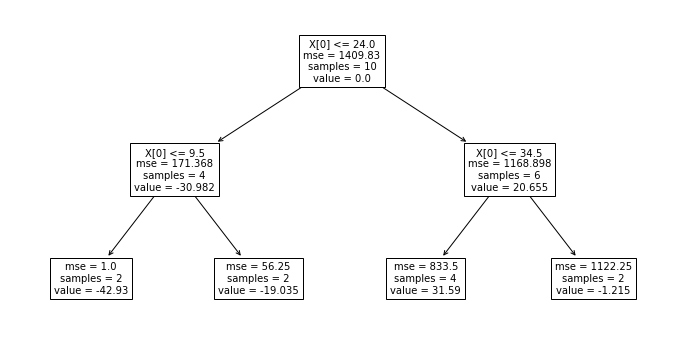

['Years', 'Years'] ['<=', '<='] [24.0, 9.5] 1 -42.92999999999999 2
['Years', 'Years'] ['<=', '>'] [24.0, 9.5] 2 -19.034999999999997 2
['Years', 'Years'] ['>', '<='] [24.0, 34.5] 3 31.590000000000003 4
['Years', 'Years'] ['>', '>'] [24.0, 34.5] 4 -1.2150000000000034 2


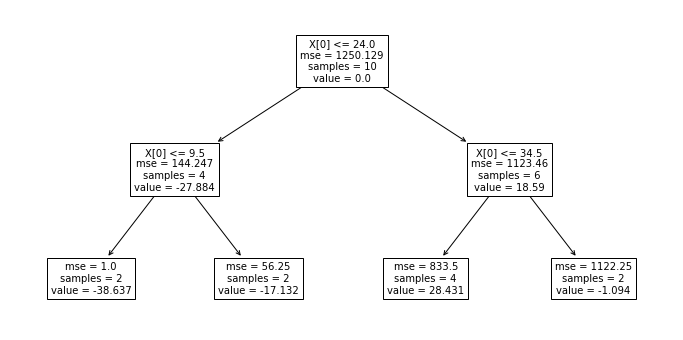

['Years', 'Years'] ['<=', '<='] [24.0, 9.5] 1 -38.637 2
['Years', 'Years'] ['<=', '>'] [24.0, 9.5] 2 -17.131500000000003 2
['Years', 'Years'] ['>', '<='] [24.0, 34.5] 3 28.43100000000001 4
['Years', 'Years'] ['>', '>'] [24.0, 34.5] 4 -1.093500000000006 2


,Years,Salary,f0,y-f0,c1,n1,h1,f1,y-f1,c2,n2,h2,f2,y-f2,c3,n3,h3,f3,y-f3,c4,n4,h4
0,5,82,134.0,-52.0,1,2,-53.0,128.70,-46.70,1,2,-47.70,123.930,-41.930,1,2,-42.930,119.6370,-37.6370,1,2,-38.6370
1,7,80,134.0,-54.0,1,2,-53.0,128.70,-48.70,1,2,-47.70,123.930,-43.930,1,2,-42.930,119.6370,-39.6370,1,2,-38.6370
2,12,103,134.0,-31.0,2,2,-23.5,131.65,-28.65,2,2,-21.15,129.535,-26.535,2,2,-19.035,127.6315,-24.6315,2,2,-17.1315
3,23,118,134.0,-16.0,2,2,-23.5,131.65,-13.65,2,2,-21.15,129.535,-11.535,2,2,-19.035,127.6315,-9.6315,2,2,-17.1315
4,25,172,134.0,38.0,3,4,39.0,137.90,34.10,3,4,35.10,141.410,30.590,3,4,31.590,144.5690,27.4310,3,4,28.4310
5,28,127,134.0,-7.0,3,4,39.0,137.90,-10.90,3,4,35.10,141.410,-14.410,3,4,31.590,144.5690,-17.5690,3,4,28.4310
6,29,204,134.0,70.0,3,4,39.0,137.90,66.10,3,4,35.10,141.410,62.590,3,4,31.590,144.5690,59.4310,3,4,28.4310
7,34,189,134.0,55.0,3,4,39.0,137.90,51.10,3,4,35.10,141.410,47.590,3,4,31.590,144.5690,44.4310,3,4,28.4310
8,35,99,134.0,-35.0,4,2,-1.5,133.85,-34.85,4,2,-1.35,133.715,-34.715,4,2,-1.215,133.5935,-34.5935,4,2,-1.0935
9,40,166,134.0,32.0,4,2,-1.5,133.85,32.15,4,2,-1.35,133.715,32.285,4,2,-1.215,133.5935,32.4065,4,2,-1.0935


In [10]:
finaldf(df, feature_names, target_name, 4)

## GB with 1 predictor variables without decision trees

In [13]:
year = [5,7,12,23,25,28,29,34,35,40]
salary = [82,80,103,118,172,127,204,189,99,166]
df = pd.DataFrame(columns=['Years','Salary'])
df.Years = year
df.Salary = salary
df

,Years,Salary
0,5,82
1,7,80
2,12,103
3,23,118
4,25,172
5,28,127
6,29,204
7,34,189
8,35,99
9,40,166


In [14]:
for i in range(4):
    f = df.Salary.mean()
    if i>0:
        df['f'+str(i)] = df['f'+str(i-1)] + df['h'+str(i)]
    else:
        df['f'+str(i)] = f
    df['y-f'+str(i)] = df.Salary - df['f'+str(i)]
    splitIndex = np.random.randint(0, df.shape[0]-1)
    a=[]
    h_upper = df['y-f'+str(i)][0:splitIndex].mean()
    h_bottom = df['y-f'+str(i)][splitIndex:].mean()
    for j in range(splitIndex):
        a.append(h_upper)
    for j in range(df.shape[0]-splitIndex):
        a.append(h_bottom)
    df['h'+str(i+1)] = a
df

,Years,Salary,f0,y-f0,h1,f1,y-f1,h2,f2,y-f2,h3,f3,y-f3,h4
0,5,82,134.0,-52.0,0.0,134.0,-52.0,0.0,134.0,-52.0,0.0,134.0,-52.0,-20.333333
1,7,80,134.0,-54.0,0.0,134.0,-54.0,0.0,134.0,-54.0,0.0,134.0,-54.0,-20.333333
2,12,103,134.0,-31.0,0.0,134.0,-31.0,0.0,134.0,-31.0,0.0,134.0,-31.0,-20.333333
3,23,118,134.0,-16.0,0.0,134.0,-16.0,0.0,134.0,-16.0,0.0,134.0,-16.0,-20.333333
4,25,172,134.0,38.0,0.0,134.0,38.0,0.0,134.0,38.0,0.0,134.0,38.0,-20.333333
5,28,127,134.0,-7.0,0.0,134.0,-7.0,0.0,134.0,-7.0,0.0,134.0,-7.0,-20.333333
6,29,204,134.0,70.0,0.0,134.0,70.0,0.0,134.0,70.0,0.0,134.0,70.0,30.500000
7,34,189,134.0,55.0,0.0,134.0,55.0,0.0,134.0,55.0,0.0,134.0,55.0,30.500000
8,35,99,134.0,-35.0,0.0,134.0,-35.0,0.0,134.0,-35.0,0.0,134.0,-35.0,30.500000
9,40,166,134.0,32.0,0.0,134.0,32.0,0.0,134.0,32.0,0.0,134.0,32.0,30.500000
